<a href="https://colab.research.google.com/github/LucasArais/gemini/blob/main/Cria%C3%A7%C3%A3o_e_edi%C3%A7%C3%A3o_de_imagens_com_o_Gemini_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🖼️ Criação e edição de imagens com o Gemini 2.0

**Conecte-se comigo no [LinkedIn](https://www.linkedin.com/in/lucas-arais/)!**

---

O Gemini 2.0 Flash Experimental suporta geração nativa de imagens, permitindo que você crie e edite imagens diretamente por meio de prompts. Isso possibilita edições rápidas via chat e abre diversas possibilidades interessantes.

Você pode usar o modelo de geração de imagens gratuitamente no [Google AI Studio](https://aistudio.google.com/prompts/new_chat?model=gemini-2.0-flash-exp). Este notebook demonstra como implementar essa funcionalidade programaticamente utilizando o SDK Python, para que você possa desenvolver seus próprios aplicativos.

##Duas maneiras de enviar prompts

Você tem duas opções para enviar prompts:

1. Chat (mantém o histórico da conversa), ideal para edições rápidas

2. Chamadas isoladas, que oferecem mais controle sem manter o histórico da conversa

A seguir, veremos ambas as abordagens.

##Tipos de prompts para geração nativa de imagens
Para trabalhar com imagens, você pode utilizar dois tipos de prompts:

- Somente texto para criar uma imagem

    - Exemplo: "Crie uma imagem de..."

- Texto + imagem para edição de imagens

  - Exemplo: "Altere a cor da imagem..."

Vamos começar e aprender como fazer isso! Você também pode conferir mais detalhes na [documentação](https://ai.google.dev/gemini-api/docs/image-generation).



In [2]:
%pip install -U -q google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 6.8 MB/s eta 0:00:00


In [3]:
from PIL import Image
from io import BytesIO
from IPython.display import display

Pegue uma chave de API gratuita [aqui](https://aistudio.google.com/apikey) e armazene-a como "Secret"

In [4]:
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

In [5]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

O nome do modelo para geração de imagens:

In [6]:
MODEL_ID = "gemini-2.0-flash-exp-image-generation"

## 1. Use o chat para edição rápida de imagens

O chat mantém o histórico da conversa. Use um chat se quiser que o modelo lembre das interações e edições anteriores. Isso permite que o modelo utilize esse contexto ao gerar novas imagens, facilitando edições rápidas e iterativas.

**Obs**: Para usar a geração nativa de imagens, é necessário definir `response_modalities` como `'Text'` e `'Image'`. Não é permitido usar apenas imagem.

In [7]:
chat = client.chats.create(
    model=MODEL_ID,
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

Vamos começar com um prompt de criação de imagem:

In [9]:
response = chat.send_message("Crie uma imagem de uma garota em Tóquio, estilo quadrinhos")

# Se você já tem uma imagem e deseja carregá-la, use isto:

# response = chat.send_message([
#     "Mude a cor do cabelo para azul",
#     Image.open('charakter.png')])

Defina uma função auxiliar para exibir a saída (a resposta pode conter texto e imagem):

In [12]:
def display_response(response, filename_to_save=None):
    for part in response.candidates[0].content.parts:
        if part.text is not None:
            print(part.text)
        elif part.inline_data is not None:
            # imprimir o tipo MIME da imagem
            image = Image.open(BytesIO(part.inline_data.data))
            if filename_to_save:  # se um nome de arquivo opcional for fornecido, salvamos a imagem
                image.save(filename_to_save)
            image.thumbnail((300, 300))  # reduzir o tamanho apenas para exibição
            display(image)

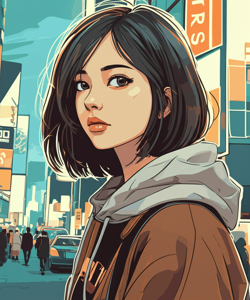

In [13]:
display_response(response, "girl.png")  # também salvamos a imagem aqui

Agora você pode editar com mais prompts:

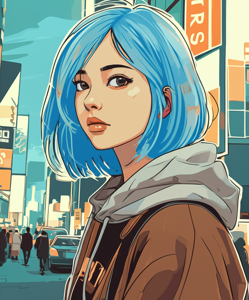

In [14]:
response = chat.send_message("mude a cor do cabelo para azul")

display_response(response)

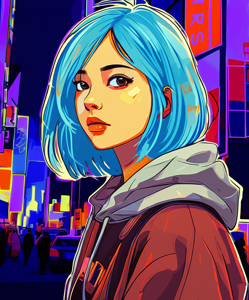

In [15]:
response = chat.send_message("faça com que seja à noite e adicione luzes de néon")

display_response(response)

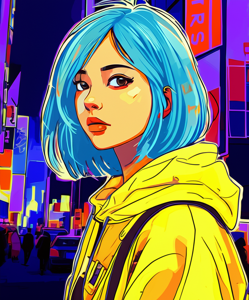

In [16]:
response = chat.send_message("mude a cor da jaqueta para amarelo")

display_response(response)

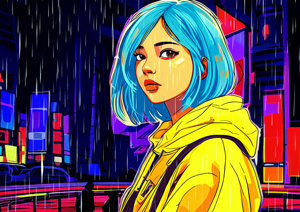

In [17]:
response = chat.send_message("adicione uma chuva leve")

display_response(response)

## 2. Use chamadas únicas do modelo  

Use `generate_content()` para criação ou edição isolada de imagens, onde o histórico do chat não é necessário e um controle preciso do prompt é preferido.  

(O [SDK chats class](https://github.com/googleapis/python-genai/blob/main/google/genai/chats.py) é um módulo de conveniência que usa `generate_content()` nos bastidores.)

In [18]:
# prompt_text_only = "Crie uma imagem de uma garota em Tóquio, estilo quadrinhos"

prompt_with_image = [
    "make it add night, add bright neon lights",
    Image.open('girl.png')
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt_with_image,
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

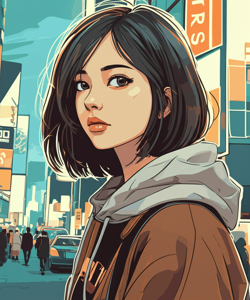

In [19]:
img = Image.open('girl.png')  # a imagem original que salvamos anteriormente
img.thumbnail((300, 300))
display(img)

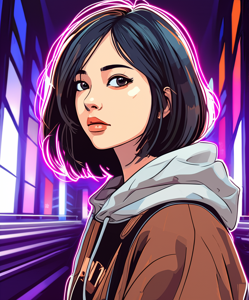

In [20]:
display_response(response)

 🔗 **Quer trocar ideias ou acompanhar mais conteúdos sobre tecnologia?** Me conecte no [LinkedIn](https://www.linkedin.com/in/lucas-arais/)!